<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Diferencias_progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#<span style="color:blue;">**Ejercicio:**</span>

Use los tamñaos de paso


a).   $h=0.1$ y $k=0.0005$

b).   $h=0.1$ y $k=0.01$

Para aproximar la solución de la ecuación de calor

$$
\frac{\partial u}{\partial t}(x, t) - \frac{\partial^2 u}{\partial x^2}(x, t) = 0, \quad 0 < x < 1, \quad 0 \leq t,
$$

con condiciones de frontera:
$$
u(0, t) = u(1, t) = 0, \quad 0 < t,
$$

y condición inicial:
$$
u(x, 0) = \sin(\pi x), \quad 0 \leq x \leq 1.
$$

Solución exacta:
$$
u(x, t) = e^{-\pi^2 t} \sin(\pi x).
$$


##<span style="color:magenta;">**Diferencias progresivas (hacia adelante) para la ecuación de calor**</span>

Dada por la expresión
$$
U_{i,j+1}=(1-2\frac{\alpha^2k}{h^2})U_{ij}+\alpha^2\frac{k}{h^2}(U_{i-1,j}+U_{i+1,j})
$$

In [113]:
import numpy as np
import matplotlib.pyplot as plt

##<span style="color:purple;">
Parámetros del problema

a).   $h=0.1$ y $k=0.0005$</span>


In [114]:
h = 0.1          # Paso espacial
k = 0.0005       # Paso temporal
T = 0.5          # Tiempo final
L = 1.0          # Longitud del dominio

 Discretización


In [115]:
x = np.arange(0, L + h, h)
t = np.arange(0, T + k, k)
nx = len(x)
nt = len(t)


Número de Fourier

In [116]:
r = k / h**2

condición inicial

In [117]:
u = np.zeros((nt, nx))
u[0, :] = np.sin(np.pi * x)   # u(x,0)


Condición de frontera

In [118]:
u[:, 0] = 0
u[:, -1] = 0

Esquema explícito de diferencias finitas

In [119]:
for n in range(0, nt - 1):
    for i in range(1, nx - 1):
        u[n + 1, i] = r * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) + u[n, i]

Solución analítica

In [120]:
u_exact = np.exp(-np.pi**2 * T) * np.sin(np.pi * x)

Gráfica

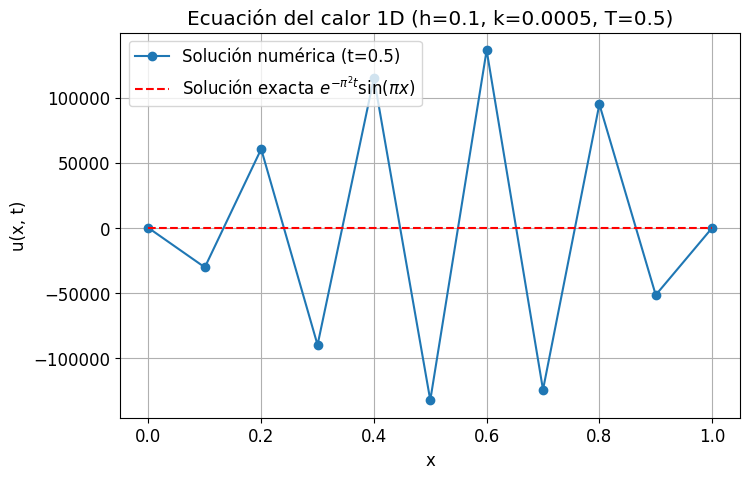

In [134]:
plt.figure(figsize=(8,5))
plt.plot(x, u[-1, :], 'o-', label='Solución numérica (t=0.5)')
plt.plot(x, u_exact, 'r--', label='Solución exacta $e^{-\\pi^2 t}\\sin(\\pi x)$')
plt.title("Ecuación del calor 1D (h=0.1, k=0.0005, T=0.5)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid(True)
plt.show()

##<span style="color:purple;">
Parámetros del problema

b).   $h=0.1$ y $k=0.01$</span>



In [122]:
h = 0.1
k = 0.01
T = 0.5
L = 1.0

Discretización

In [123]:
x = np.arange(0, L + h, h)
t = np.arange(0, T + k, k)
nx = len(x)
nt = len(t)


In [124]:
r = k / h**2
print("Número de Fourier r =", r)

Número de Fourier r = 0.9999999999999998


Matriz solución

In [125]:
u = np.zeros((nt, nx))
u[0, :] = np.sin(np.pi * x)

# Fronteras
u[:, 0] = 0
u[:, -1] = 0

# Esquema explícito
for n in range(0, nt - 1):
    for i in range(1, nx - 1):
        u[n + 1, i] = r * (u[n, i + 1] - 2*u[n, i] + u[n, i - 1]) + u[n, i]


Solución exacta

In [126]:
u_exact = np.exp(-np.pi**2 * T) * np.sin(np.pi * x)

Grafica

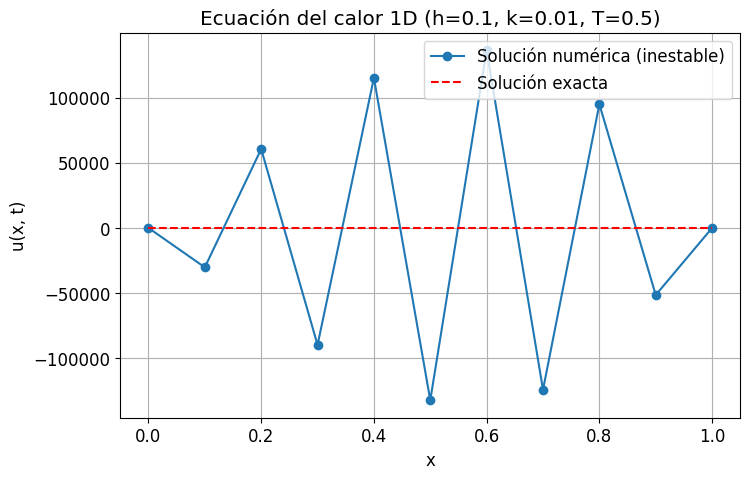

In [133]:
plt.figure(figsize=(8,5))
plt.plot(x, u[-1, :], 'o-', label='Solución numérica (inestable)')
plt.plot(x, u_exact, 'r--', label='Solución exacta')
plt.title("Ecuación del calor 1D (h=0.1, k=0.01, T=0.5)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid(True)
plt.show()

Comparación graficas y resultados

In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
def exact_solution(x, t):
    """Solución exacta de la ecuación del calor"""
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

definimos la funcion para el uso de diferencias finitas progresivas

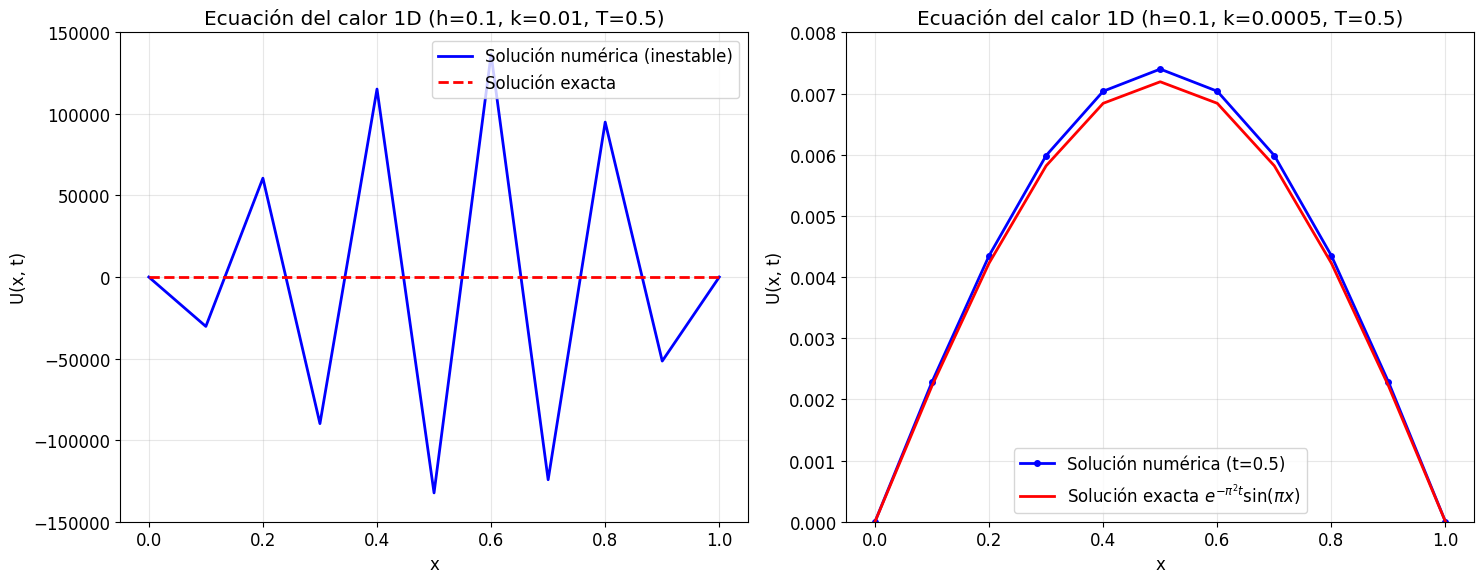

In [130]:
def solve_heat_equation_explicit(h, k, t_final=0.5):
    """
    Resuelve la ecuación del calor usando el método explícito de diferencias finitas
    """
    # Número de puntos en espacio y tiempo
    nx = int(1/h) + 1
    nt = int(t_final/k) + 1

    # Mallado
    x = np.linspace(0, 1, nx)
    t = np.linspace(0, t_final, nt)

    # Parámetro de estabilidad
    r = k / h**2

    # Inicializar solución
    u = np.zeros((nt, nx))

    # Condición inicial
    u[0, :] = np.sin(np.pi * x)

    # Condiciones de frontera
    u[:, 0] = 0
    u[:, -1] = 0

    # Iteración en tiempo (método explícito)
    for n in range(0, nt-1):
        for i in range(1, nx-1):
            u[n+1, i] = u[n, i] + r * (u[n, i+1] - 2*u[n, i] + u[n, i-1])

    return x, t, u, r

# Configuración de los gráficos
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12

# Crear figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# =============================================================================
# GRÁFICO 1: Caso inestable (h=0.1, k=0.01)
# =============================================================================

# Parámetros para caso inestable
h1, k1, t_final = 0.1, 0.01, 0.5
x1, t1, u1, r1 = solve_heat_equation_explicit(h1, k1, t_final)
u_exact1 = exact_solution(x1, t_final)

# Gráfico del caso inestable
ax1.plot(x1, u1[-1, :], 'b-', linewidth=2, label='Solución numérica (inestable)')
ax1.plot(x1, u_exact1, 'r--', linewidth=2, label='Solución exacta')
ax1.set_xlabel('x')
ax1.set_ylabel('U(x, t)')
ax1.set_title('Ecuación del calor 1D (h=0.1, k=0.01, T=0.5)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-150000, 150000)  # Ajuste para mostrar la inestabilidad

# =============================================================================
# GRÁFICO 2: Caso estable (h=0.1, k=0.0005)
# =============================================================================

# Parámetros para caso estable
h2, k2 = 0.1, 0.0005
x2, t2, u2, r2 = solve_heat_equation_explicit(h2, k2, t_final)
u_exact2 = exact_solution(x2, t_final)

# Gráfico del caso estable
ax2.plot(x2, u2[-1, :], 'bo-', markersize=4, linewidth=2, label='Solución numérica (t=0.5)')
ax2.plot(x2, u_exact2, 'r-', linewidth=2, label=r'Solución exacta $e^{-\pi^2 t} \sin(\pi x)$')
ax2.set_xlabel('x')
ax2.set_ylabel('U(x, t)')
ax2.set_title('Ecuación del calor 1D (h=0.1, k=0.0005, T=0.5)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 0.008)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()


TABLA COMPARATIVA

In [131]:
print("\n" + "="*100)
print("TABLA COMPARATIVA DE SOLUCIONES EN t = 0.5")
print("="*100)
print(f"{'x_i':<8} {'u(x_i,0.5)':<15} {'w_i,1000 (k=0.0005)':<20} {'|Error| k=0.0005':<18} {'w_i,50 (k=0.01)':<20} {'|Error| k=0.01':<15}")
print("-" * 100)
#Generar datos para la tabla
for i in range(len(x1)):
    error1 = abs(u_exact1[i] - u1[-1, i])
    error2 = abs(u_exact2[i] - u2[-1, i])

    print(f"{x1[i]:<8.1f} {u_exact1[i]:<15.8f} {u2[-1, i]:<20.8f} {error2:<18.2e} {u1[-1, i]:<20.8f} {error1:<15.2e}")

print("-" * 100)


TABLA COMPARATIVA DE SOLUCIONES EN t = 0.5
x_i      u(x_i,0.5)      w_i,1000 (k=0.0005)  |Error| k=0.0005   w_i,50 (k=0.01)      |Error| k=0.01 
----------------------------------------------------------------------------------------------------
0.0      0.00000000      0.00000000           0.00e+00           0.00000000           0.00e+00       
0.1      0.00222241      0.00228652           6.41e-05           -30266.27002582      3.03e+04       
0.2      0.00422728      0.00434922           1.22e-04           60588.05498097       6.06e+04       
0.3      0.00581836      0.00598619           1.68e-04           -89862.84234503      8.99e+04       
0.4      0.00683989      0.00703719           1.97e-04           115225.53791694      1.15e+05       
0.5      0.00719188      0.00739934           2.07e-04           -132328.39281378     1.32e+05       
0.6      0.00683989      0.00703719           1.97e-04           136478.81591476      1.36e+05       
0.7      0.00581836      0.00598619    

calculo de errores

In [132]:
error_max1 = np.max(np.abs(u_exact1 - u1[-1, :]))
error_max2 = np.max(np.abs(u_exact2 - u2[-1, :]))
error_rms1 = np.sqrt(np.mean((u_exact1 - u1[-1, :])**2))
error_rms2 = np.sqrt(np.mean((u_exact2 - u2[-1, :])**2))

print(f"\nRESUMEN DE ERRORES:")
print(f"Caso a) h=0.1, k=0.0005: Error máximo = {error_max2:.2e}, Error RMS = {error_rms2:.2e}")
print(f"Caso b) h=0.1, k=0.01:   Error máximo = {error_max1:.2e}, Error RMS = {error_rms1:.2e}")


RESUMEN DE ERRORES:
Caso a) h=0.1, k=0.0005: Error máximo = 2.07e-04, Error RMS = 1.40e-04
Caso b) h=0.1, k=0.01:   Error máximo = 1.36e+05, Error RMS = 9.00e+04


Condición de Estabilidad:
$$
r = \frac{k}{h ^ 2 } \leq 0.5
$$
Generalización si $\alpha \neq 1$
$$
r = \frac{\alpha k}{h ^ 2 } \leq \frac{1}{2}
$$

**Conclusión:**

La elección de los parámetros h y k es crucial para la estabilidad del método explícito.
El caso a) con k pequeño produce resultados precisos y estables, mientras que el caso b)
con k grande viola la condición de estabilidad y genera soluciones numéricamente inaceptables.
Esto demuestra la importancia de entender las limitaciones de los métodos numéricos